# IMPORTACION DE DATOS

In [2]:
#importacion
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
#Creando variables URL con los csv
url1="https://raw.githubusercontent.com/LuisCTen/Challenge-Alura-Store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2="https://raw.githubusercontent.com/LuisCTen/Challenge-Alura-Store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3="https://raw.githubusercontent.com/LuisCTen/Challenge-Alura-Store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4="https://raw.githubusercontent.com/LuisCTen/Challenge-Alura-Store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [4]:
#Verificando que se lea el csv 
tienda_1=pd.read_csv(url1)
tienda_2=pd.read_csv(url2)
tienda_3=pd.read_csv(url3)
tienda_4=pd.read_csv(url4)
print(tienda_1.head(2))
print(tienda_2.head(2))
print(tienda_3.head(2))
print(tienda_4.head(2))

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   

       Método de pago  Cantidad de cuotas      lat       lon  
0  Tarjeta de crédito                   8  4.60971 -74.08175  
1  Tarjeta de crédito                   4  6.25184 -75.56359  
           Producto  Categoría del Producto    Precio  Costo de envío  \
0  Silla de oficina                 Muebles  283600.0         15300.0   
1         Pandereta  Instrumentos musicales   76800.0          2300.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      04/08/2021  Izabela de León        Medellín             1   
1      26/11/2020   Blanca Ram

# Analisis general de los datasets

Como analisis exploratorio, se encontro lo siguiente:

Todos los datasets tiene los mismos productos y la misma cantidad de registros(2359)

In [5]:
#Analizando las columnas de los csv
print(f'La cantidad de registros de la tienda_1 es: {len(tienda_1["Producto"])}')
print(f'Cantidad de productos únicos en la tienda_1: {tienda_1["Producto"].nunique()}')


La cantidad de registros de la tienda_1 es: 2359
Cantidad de productos únicos en la tienda_1: 51


Tipos de datos

In [6]:
print(tienda_1.dtypes)

Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object


Verificacion de valores nulos en las columnas de cada tienda.

**Se observo data completa**

In [7]:
# Verificar si hay valores nulos en cada columna
valores_vacios = tienda_4.isnull().sum()
print(valores_vacios)

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64


# Analisis especifico

## 1. Analisis de facturación
 Se debe calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [8]:
totalRenueve_store1=tienda_1["Precio"].sum()
totalRenueve_store2=tienda_2["Precio"].sum()
totalRenueve_store3=tienda_3["Precio"].sum()
totalRenueve_store4=tienda_4["Precio"].sum()

total_renueve={
    'Store 1':totalRenueve_store1,
    'Store 2':totalRenueve_store2,
    'Store 3':totalRenueve_store3,
    'Store 4':totalRenueve_store4,
}

total_renueve_ordered=sorted(total_renueve.items(),key=lambda x:x[1],reverse=True)

# Formatear los valores de los ingresos
total_renueve_orderedFormat = [f'{ingreso:,.0f}' for _, ingreso in total_renueve_ordered]
# Imprimir los ingresos formateados
print("Ingresos totales ordenados:")
for tienda, ingreso in zip(total_renueve.keys(), total_renueve_orderedFormat):
    print(f'{tienda}: {ingreso}')

Ingresos totales ordenados:
Store 1: 1,150,880,400
Store 2: 1,116,343,500
Store 3: 1,098,019,600
Store 4: 1,038,375,700


### Grafica

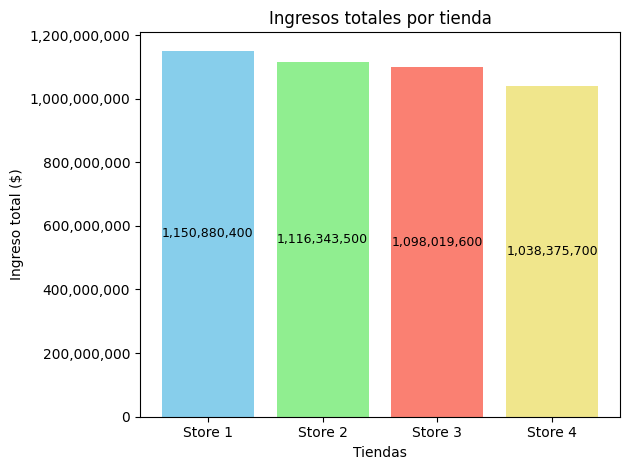

In [9]:
# Datos de ejemplo
lista_tiendas = total_renueve.keys()
lista_totales = total_renueve.values()

# Colores personalizados para cada barra
colores = ['skyblue', 'lightgreen', 'salmon', 'khaki']
# Crear gráfico
fig, ax = plt.subplots()
barras = ax.bar(lista_tiendas, lista_totales, color=colores)

# Quitar notación científica y formatear con separadores de miles
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,.0f}'))

# Añadir líneas horizontales
#ax.yaxis.grid(True, linestyle='--', color='black', alpha=0.6)

# Añadir etiquetas DENTRO de las barras
for barra in barras:
    altura = barra.get_height()
    texto = f'{int(altura):,}'
    ax.text(
        barra.get_x() + barra.get_width() / 2,   # posición horizontal centrada
        altura * 0.5,                            # posición vertical a mitad de la barra
        texto,
        ha='center', va='center', fontsize=9, color='black'
    )

# Títulos y ejes
ax.set_title('Ingresos totales por tienda')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Ingreso total ($)')
plt.tight_layout()
plt.show()


## 2. Ventas por categoria
 calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [10]:
# Función para contar productos vendidos por categoría
def contar_ventas_por_categoria(categorias, productos):
    # Crear un diccionario para almacenar el conteo de cada categoría
    conteo_categorias = {}

    # Iterar a través de las categorías y productos
    for categoria, producto in zip(categorias, productos):
        if categoria in conteo_categorias:
            conteo_categorias[categoria] += 1  # Incrementar si ya existe la categoría
        else:
            conteo_categorias[categoria] = 1  # Inicializar si no existe la categoría

    return conteo_categorias

# Contar ventas por categoría en tienda 1
ventas_tienda_1 = contar_ventas_por_categoria(tienda_1["Categoría del Producto"], tienda_1["Producto"])
# Mostrar resultados
#ingresosOrdenados = sorted(ingresosTotales.items(), key=lambda x: x[1])
categoriasOrdenadas1=sorted(ventas_tienda_1.items(), key=lambda x: x[1])
#Tienda 1
print("-------------------------------------------------")
print("Tienda 1")
for categoria, productos in  categoriasOrdenadas1:
    print(f'{categoria}: {productos}')

# Contar ventas por categoría en tienda 2
ventas_tienda_2 = contar_ventas_por_categoria(tienda_2["Categoría del Producto"], tienda_2["Producto"])
# Mostrar resultados
#ingresosOrdenados = sorted(ingresosTotales.items(), key=lambda x: x[1])
categoriasOrdenadas2=sorted(ventas_tienda_2.items(), key=lambda x: x[1])
#Tienda 1
print("-------------------------------------------------")
print("Tienda 2")
for categoria, productos in  categoriasOrdenadas2:
    print(f'{categoria}: {productos}')

# Contar ventas por categoría en tienda 3
ventas_tienda_3 = contar_ventas_por_categoria(tienda_3["Categoría del Producto"], tienda_3["Producto"])
# Mostrar resultados
#ingresosOrdenados = sorted(ingresosTotales.items(), key=lambda x: x[1])
categoriasOrdenadas3=sorted(ventas_tienda_3.items(), key=lambda x: x[1])
#Tienda 1
print("-------------------------------------------------")
print("Tienda 3")
for categoria, productos in  categoriasOrdenadas3:
    print(f'{categoria}: {productos}')


# Contar ventas por categoría en tienda 4
ventas_tienda_4 = contar_ventas_por_categoria(tienda_4["Categoría del Producto"], tienda_4["Producto"])
# Mostrar resultados
#ingresosOrdenados = sorted(ingresosTotales.items(), key=lambda x: x[1])
categoriasOrdenadas4=sorted(ventas_tienda_4.items(), key=lambda x: x[1])
#Tienda 1
print("-------------------------------------------------")
print("Tienda 4")
for categoria, productos in  categoriasOrdenadas4:
    print(f'{categoria}: {productos}')





-------------------------------------------------
Tienda 1
Artículos para el hogar: 171
Libros: 173
Instrumentos musicales: 182
Deportes y diversión: 284
Electrodomésticos: 312
Juguetes: 324
Electrónicos: 448
Muebles: 465
-------------------------------------------------
Tienda 2
Artículos para el hogar: 181
Libros: 197
Instrumentos musicales: 224
Deportes y diversión: 275
Electrodomésticos: 305
Juguetes: 313
Electrónicos: 422
Muebles: 442
-------------------------------------------------
Tienda 3
Instrumentos musicales: 177
Artículos para el hogar: 177
Libros: 185
Deportes y diversión: 277
Electrodomésticos: 278
Juguetes: 315
Electrónicos: 451
Muebles: 499
-------------------------------------------------
Tienda 4
Instrumentos musicales: 170
Libros: 187
Artículos para el hogar: 201
Electrodomésticos: 254
Deportes y diversión: 277
Juguetes: 338
Electrónicos: 451
Muebles: 480


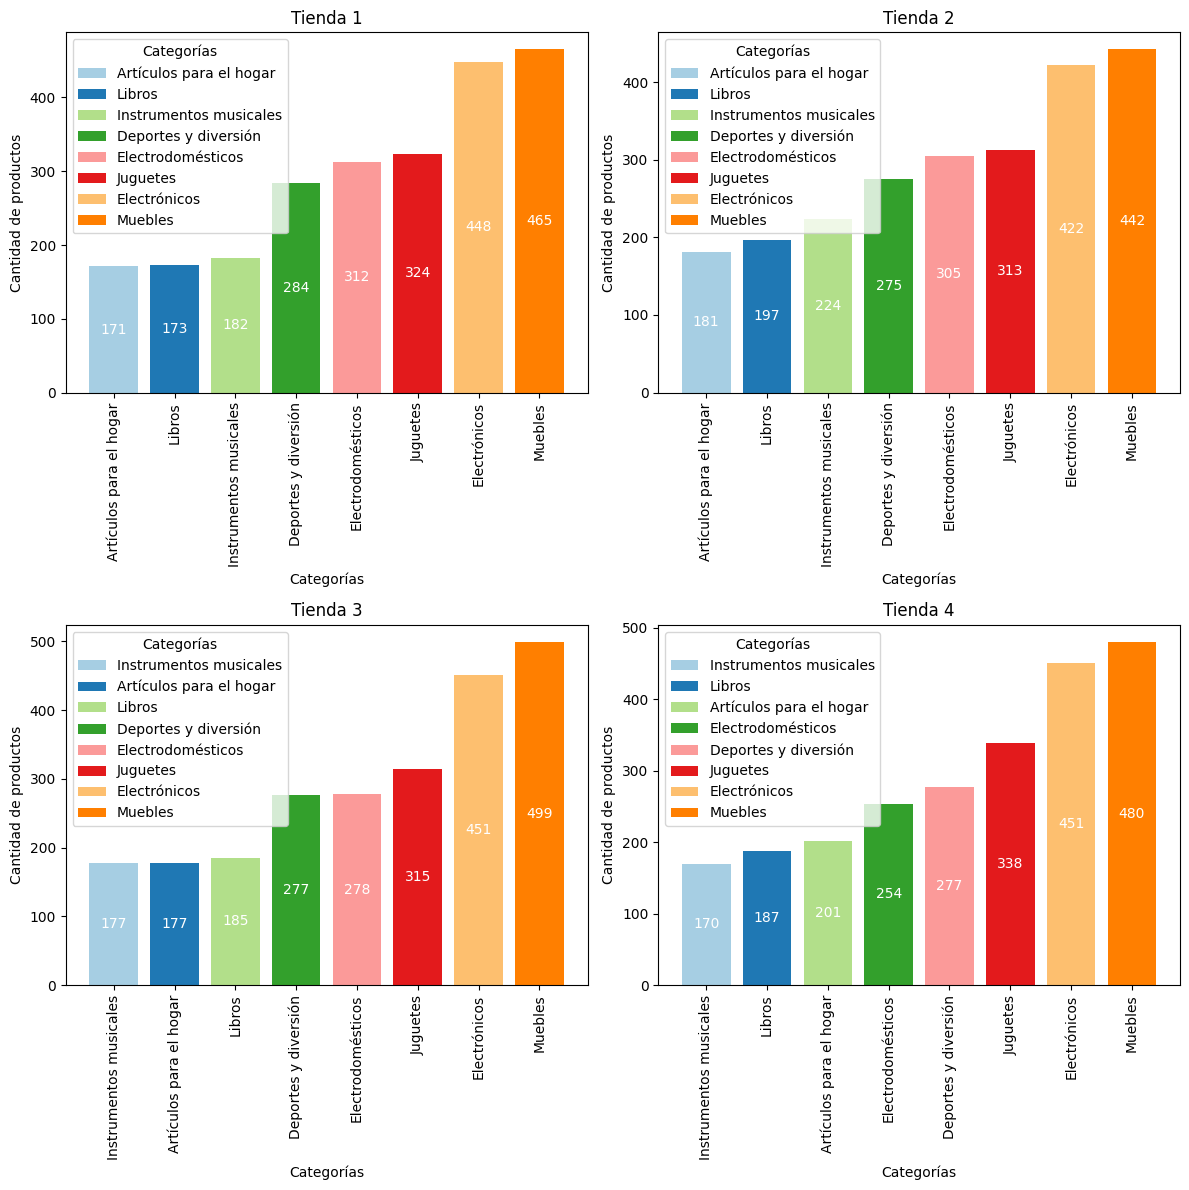

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar barras apiladas con los valores dentro de las barras
def graficar_barras_apiladas(categorias_ventas, tienda_numero, ax):
    categorias = list(categorias_ventas.keys())
    cantidad_productos = list(categorias_ventas.values())

    # Definir las posiciones de las barras
    indices = np.arange(len(categorias))  # Índices de las categorías

    # Graficar barras apiladas
    bars = ax.bar(indices, cantidad_productos, color=plt.cm.Paired.colors[:len(categorias)], label=categorias)

    # Agregar los valores dentro de las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                f'{height}', ha='center', va='center', color='white', fontsize=10)

    ax.set_title(f"Tienda {tienda_numero}")
    ax.set_xlabel("Categorías")
    ax.set_ylabel("Cantidad de productos")
    
    # Centrar las etiquetas del eje X
    ax.set_xticks(indices)
    ax.set_xticklabels(categorias, rotation=90, ha='center')  # Alineación centrada y rotación para mejor legibilidad

    ax.legend(title="Categorías", loc="upper left")

# Crear la figura y los ejes para organizar los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2 filas y 2 columnas

# Graficar los resultados para cada tienda en su respectivo subgráfico
graficar_barras_apiladas(dict(categoriasOrdenadas1), 1, axs[0, 0])  # Tienda 1 en (0, 0)
graficar_barras_apiladas(dict(categoriasOrdenadas2), 2, axs[0, 1])  # Tienda 2 en (0, 1)
graficar_barras_apiladas(dict(categoriasOrdenadas3), 3, axs[1, 0])  # Tienda 3 en (1, 0)
graficar_barras_apiladas(dict(categoriasOrdenadas4), 4, axs[1, 1])  # Tienda 4 en (1, 1)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


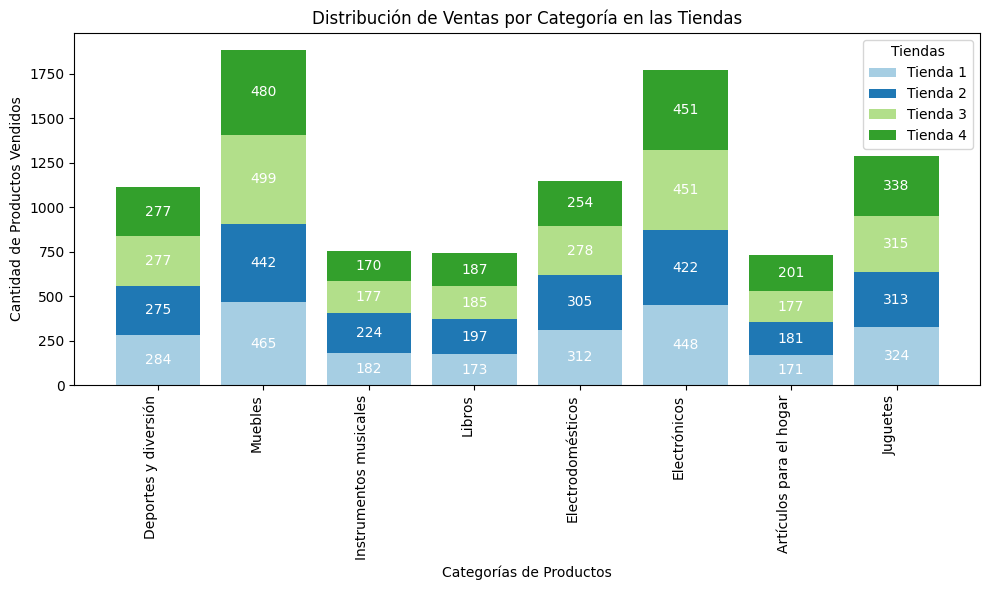

In [12]:
# Función para contar productos vendidos por categoría
def contar_ventas_por_categoria(categorias, productos):
    conteo_categorias = {}
    for categoria, producto in zip(categorias, productos):
        if categoria in conteo_categorias:
            conteo_categorias[categoria] += 1  # Incrementar si ya existe la categoría
        else:
            conteo_categorias[categoria] = 1  # Inicializar si no existe la categoría
    return conteo_categorias

# Contamos las ventas por categoría para cada tienda
ventas_tienda_1 = contar_ventas_por_categoria(tienda_1["Categoría del Producto"], tienda_1["Producto"])
ventas_tienda_2 = contar_ventas_por_categoria(tienda_2["Categoría del Producto"], tienda_2["Producto"])
ventas_tienda_3 = contar_ventas_por_categoria(tienda_3["Categoría del Producto"], tienda_3["Producto"])
ventas_tienda_4 = contar_ventas_por_categoria(tienda_4["Categoría del Producto"], tienda_4["Producto"])

# Asegurarnos de que las categorías sean las mismas para todas las tiendas
categorias = list(set(ventas_tienda_1.keys()) | set(ventas_tienda_2.keys()) | set(ventas_tienda_3.keys()) | set(ventas_tienda_4.keys()))

# Obtener las ventas por categoría para cada tienda, asegurándonos de que si una tienda no tiene una categoría, la cantidad sea 0
def ventas_por_categoria(tienda_ventas, categorias):
    return [tienda_ventas.get(categoria, 0) for categoria in categorias]

# Obtener las ventas para cada tienda
ventas_tienda_1 = ventas_por_categoria(ventas_tienda_1, categorias)
ventas_tienda_2 = ventas_por_categoria(ventas_tienda_2, categorias)
ventas_tienda_3 = ventas_por_categoria(ventas_tienda_3, categorias)
ventas_tienda_4 = ventas_por_categoria(ventas_tienda_4, categorias)

# Convertir las ventas de cada tienda en un arreglo de numpy
ventas_tiendas = np.array([ventas_tienda_1, ventas_tienda_2, ventas_tienda_3, ventas_tienda_4])

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Colores para las categorías
colores = plt.cm.Paired.colors[:len(categorias)]

# Crear las barras apiladas para cada tienda
bottoms = np.zeros(len(categorias))  # Posición base de cada categoría
for i, ventas in enumerate(ventas_tiendas):
    ax.bar(categorias, ventas, bottom=bottoms, color=colores[i], label=f'Tienda {i+1}')
    bottoms += ventas  # Actualizar la base para la siguiente categoría

# Agregar los valores dentro de las barras
bottoms = np.zeros(len(categorias))  # Resetear la base
for i, ventas in enumerate(ventas_tiendas):
    for j, (venta, bottom) in enumerate(zip(ventas, bottoms)):
        ax.text(j, bottom + venta / 2, str(venta), ha='center', va='center', color='white', fontsize=10)
    bottoms += ventas  # Actualizar la base para la siguiente categoría

# Etiquetas y título
ax.set_title('Distribución de Ventas por Categoría en las Tiendas')
ax.set_xlabel('Categorías de Productos')
ax.set_ylabel('Cantidad de Productos Vendidos')

# Rotar las etiquetas del eje X para mayor legibilidad
ax.set_xticks(np.arange(len(categorias)))
ax.set_xticklabels(categorias, rotation=90, ha='right')

# Leyenda
ax.legend(title="Tiendas", loc="upper right")

# Ajustar el espacio para que todo sea visible
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 3. Calificación promedio de la tienda
Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [13]:
calificacion_promedio_tienda={
    "Tienda 1":round(tienda_1["Calificación"].mean(),2),
    "Tienda 2":round(tienda_2["Calificación"].mean(),2),
    "Tienda 3":round(tienda_3["Calificación"].mean(),2),
    "Tienda 4":round(tienda_4["Calificación"].mean(),2),
}
calificacion_promedio_tiendaOrdenadas=sorted(calificacion_promedio_tienda.items(), key=lambda x: x[1])
for clave, valor in calificacion_promedio_tiendaOrdenadas:
    print(f'{clave} tiene una puntuación promedio de: {valor}')



Tienda 1 tiene una puntuación promedio de: 3.98
Tienda 4 tiene una puntuación promedio de: 4.0
Tienda 2 tiene una puntuación promedio de: 4.04
Tienda 3 tiene una puntuación promedio de: 4.05


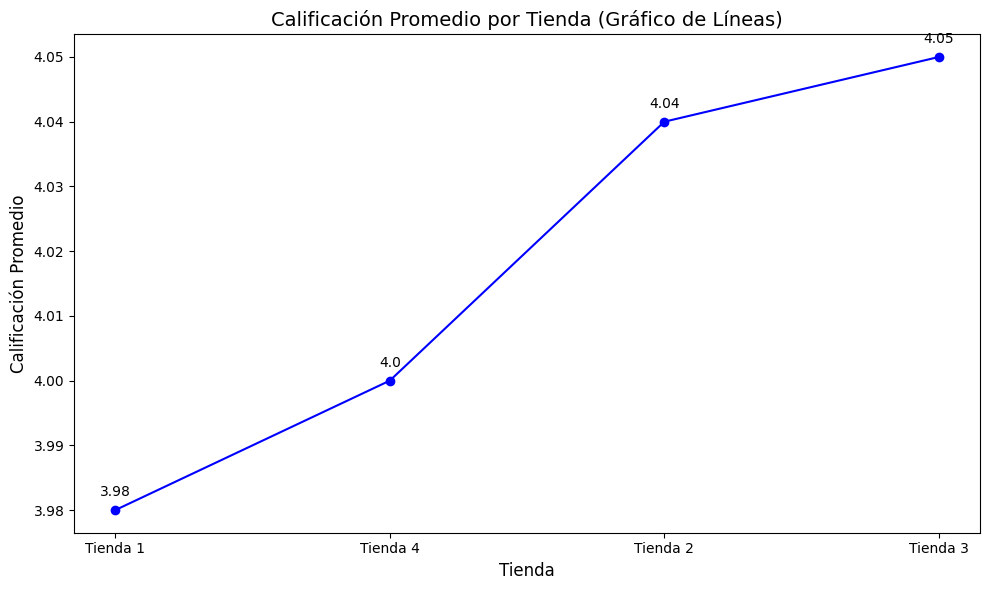

In [14]:
import matplotlib.pyplot as plt

# Datos de calificación promedio (ya calculados previamente)
calificacion_promedio_tienda = {
    "Tienda 1": round(tienda_1["Calificación"].mean(), 2),
    "Tienda 2": round(tienda_2["Calificación"].mean(), 2),
    "Tienda 3": round(tienda_3["Calificación"].mean(), 2),
    "Tienda 4": round(tienda_4["Calificación"].mean(), 2),
}

# Ordenar las calificaciones de menor a mayor
calificacion_promedio_tiendaOrdenadas = sorted(calificacion_promedio_tienda.items(), key=lambda x: x[1])

# Separar las tiendas y sus calificaciones para el gráfico
tiendas = [clave for clave, _ in calificacion_promedio_tiendaOrdenadas]
calificaciones = [valor for _, valor in calificacion_promedio_tiendaOrdenadas]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tiendas, calificaciones, marker='o', linestyle='-', color='b', label='Calificación Promedio')

# Añadir etiquetas de calificación
for i, txt in enumerate(calificaciones):
    ax.annotate(txt, (tiendas[i], calificaciones[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Título y etiquetas
ax.set_title('Calificación Promedio por Tienda (Gráfico de Líneas)', fontsize=14)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## 4. Producto más y menos vendido
identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [15]:
def cantidades_por_productos(tienda,top):
    cantidad_X_producto={}
    for producto in tienda:
        if producto in cantidad_X_producto:
            cantidad_X_producto[producto]+=1
        else:
            cantidad_X_producto[producto]=1
    if top=="maximo":
        cantidad_X_producto_ordenado = sorted(cantidad_X_producto.items(), key=lambda x: x[1], reverse=True)[:5]
    elif top=='minimo':
        cantidad_X_producto_ordenado = sorted(cantidad_X_producto.items(), key=lambda x: x[1])[:5]
    else:
        cantidad_X_producto_ordenado=sorted(cantidad_X_producto.items(),key=lambda x:x[1])
    
    return cantidad_X_producto_ordenado

In [16]:
print("-------------------------------")
print('|||TIENDA 1|||')
print(f'El top 5 de productos en la tienda 1 es :{cantidades_por_productos(tienda_1["Producto"],"maximo")}')
print(f'Los 5 productos menos vendidos de la tienda 1 es :{cantidades_por_productos(tienda_1["Producto"],"minimo")}')
print("-------------------------------")
print('|||TIENDA 2|||')
print(f'El top 5 de productos en la tienda 2 es :{cantidades_por_productos(tienda_2["Producto"],"maximo")}')
print(f'Los 5 productos menos vendidos de la tienda 2 es :{cantidades_por_productos(tienda_2["Producto"],"minimo")}')
print("-------------------------------")
print('|||TIENDA 3|||')
print(f'El top 5 de productos en la tienda 2 es :{cantidades_por_productos(tienda_3["Producto"],"maximo")}')
print(f'Los 5 productos menos vendidos de la tienda 2 es :{cantidades_por_productos(tienda_3["Producto"],"minimo")}')
print("-------------------------------")
print('|||TIENDA 4|||')
print(f'El top 5 de productos en la tienda 2 es :{cantidades_por_productos(tienda_4["Producto"],"maximo")}')
print(f'Los 5 productos menos vendidos de la tienda 2 es :{cantidades_por_productos(tienda_4["Producto"],"minimo")}')


-------------------------------
|||TIENDA 1|||
El top 5 de productos en la tienda 1 es :[('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60), ('Secadora de ropa', 58), ('Bloques de construcción', 56)]
Los 5 productos menos vendidos de la tienda 1 es :[('Auriculares con micrófono', 33), ('Celular ABXY', 33), ('Olla de presión', 35), ('Pandereta', 36), ('Ciencia de datos con Python', 39)]
-------------------------------
|||TIENDA 2|||
El top 5 de productos en la tienda 2 es :[('Iniciando en programación', 65), ('Microondas', 62), ('Batería', 61), ('Pandereta', 58), ('Guitarra acústica', 58)]
Los 5 productos menos vendidos de la tienda 2 es :[('Juego de mesa', 32), ('Mesa de comedor', 34), ('Impresora', 34), ('Sillón', 35), ('Auriculares', 37)]
-------------------------------
|||TIENDA 3|||
El top 5 de productos en la tienda 2 es :[('Kit de bancas', 57), ('Mesa de comedor', 56), ('Cama king', 56), ('Mesa de noche', 55), ('Set de ollas', 55)]
Los 5 productos menos vendidos de la tie

|||TIENDA 1|||


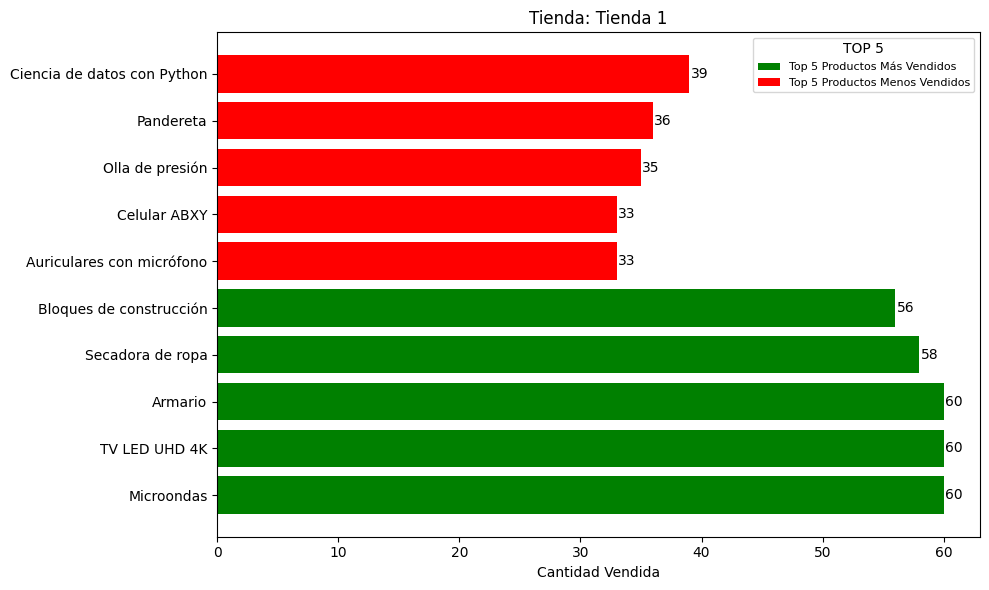

|||TIENDA 2|||


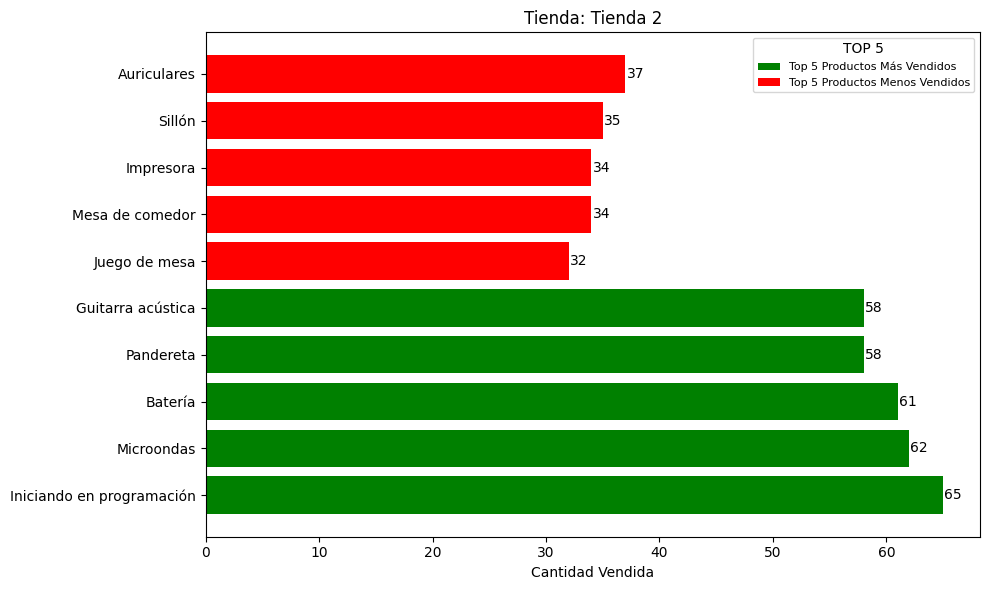

|||TIENDA 3|||


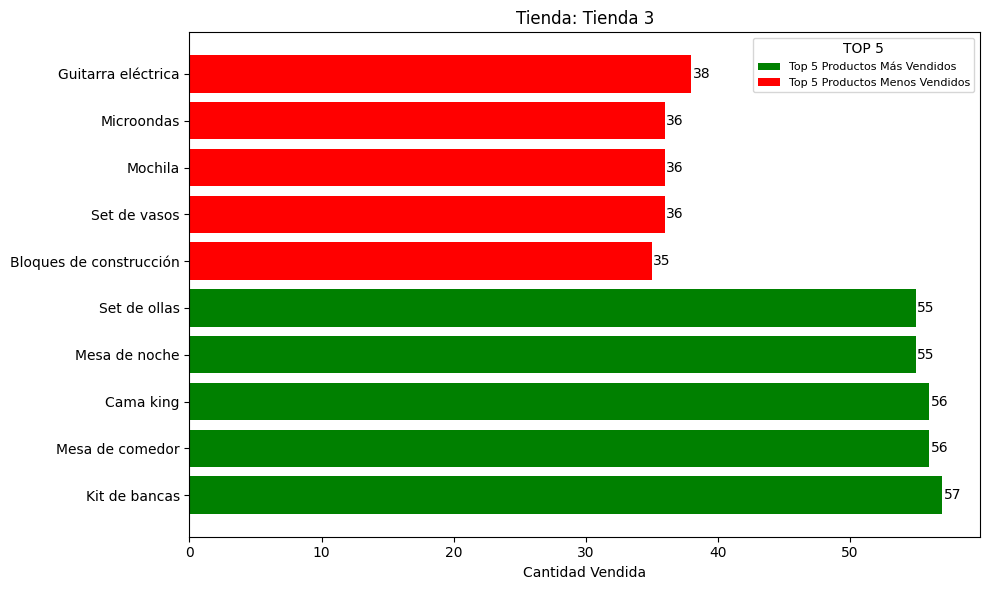

|||TIENDA 4|||


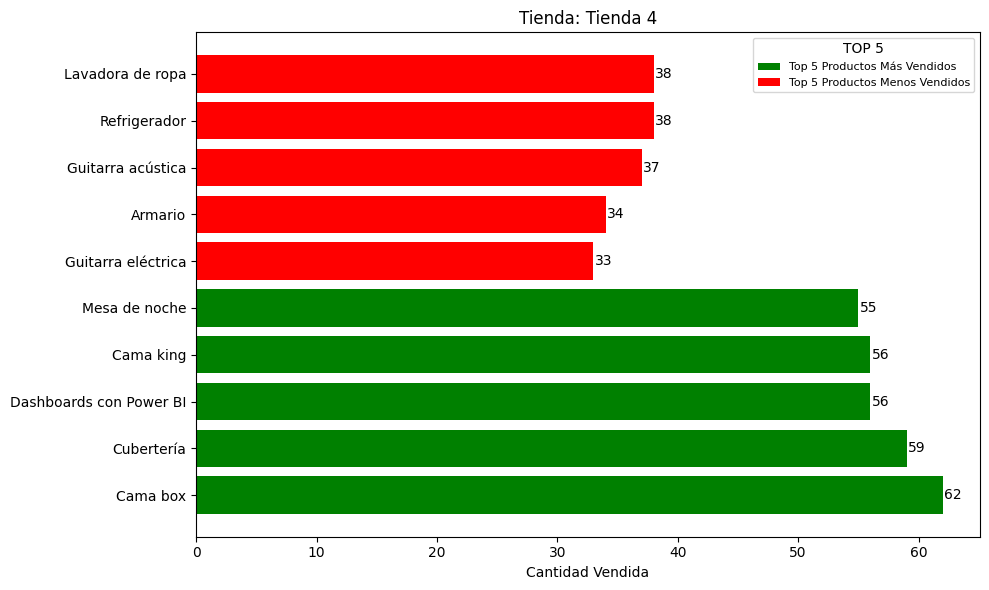

In [17]:
# Función para graficar los productos más vendidos y menos vendidos
def graficar_top_bottom(tienda, nombre_tienda):
    top_5 = cantidades_por_productos(tienda, "maximo")
    bottom_5 = cantidades_por_productos(tienda, "minimo")

    # Separar los nombres de los productos y las cantidades
    productos_top = [item[0] for item in top_5]
    cantidades_top = [item[1] for item in top_5]

    productos_bottom = [item[0] for item in bottom_5]
    cantidades_bottom = [item[1] for item in bottom_5]

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Establecer las posiciones de las barras
    y_pos_top = np.arange(len(productos_top))
    y_pos_bottom = np.arange(len(productos_bottom))

    # Crear las barras
    ax.barh(y_pos_top, cantidades_top, color='green', label='Top 5 Productos Más Vendidos')
    ax.barh(y_pos_bottom + len(productos_top), cantidades_bottom, color='red', label='Top 5 Productos Menos Vendidos')

    # Agregar etiquetas dentro de las barras
    for i, (producto, cantidad) in enumerate(zip(productos_top, cantidades_top)):
        ax.text(cantidades_top[i] + 0.1, y_pos_top[i], str(cantidad), ha='left', va='center', fontsize=10)

    for i, (producto, cantidad) in enumerate(zip(productos_bottom, cantidades_bottom)):
        ax.text(cantidades_bottom[i] + 0.1, y_pos_bottom[i] + len(productos_top), str(cantidad), ha='left', va='center', fontsize=10)

    # Agregar etiquetas de los productos
    ax.set_yticks(np.concatenate([y_pos_top, y_pos_bottom + len(productos_top)]))
    ax.set_yticklabels(productos_top + productos_bottom)
    ax.set_xlabel('Cantidad Vendida')
    ax.set_title(f'Tienda: {nombre_tienda}')

    # Agregar la leyenda
    ax.legend(title="TOP 5", loc="upper right",fontsize=8)

    # Ajustar el gráfico
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Graficar para cada tienda
print('|||TIENDA 1|||')
graficar_top_bottom(tienda_1["Producto"], 'Tienda 1')

print('|||TIENDA 2|||')
graficar_top_bottom(tienda_2["Producto"], 'Tienda 2')

print('|||TIENDA 3|||')
graficar_top_bottom(tienda_3["Producto"], 'Tienda 3')

print('|||TIENDA 4|||')
graficar_top_bottom(tienda_4["Producto"], 'Tienda 4')

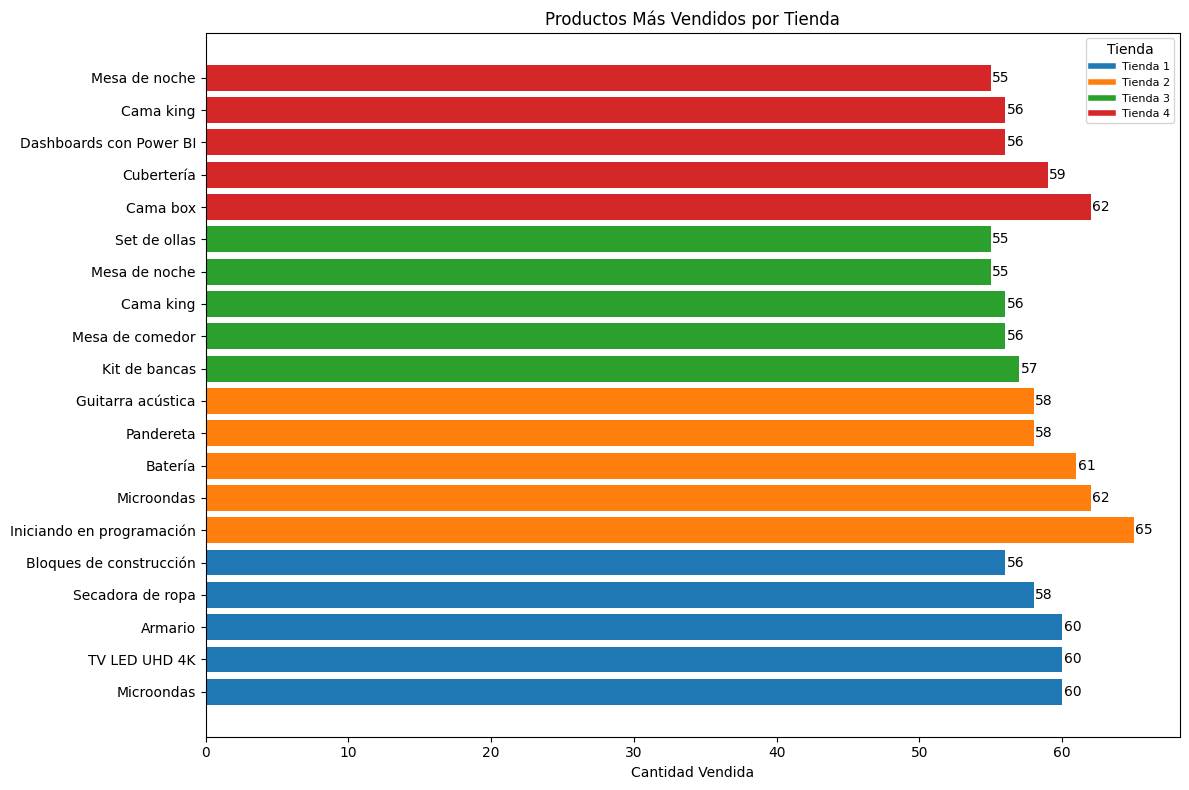

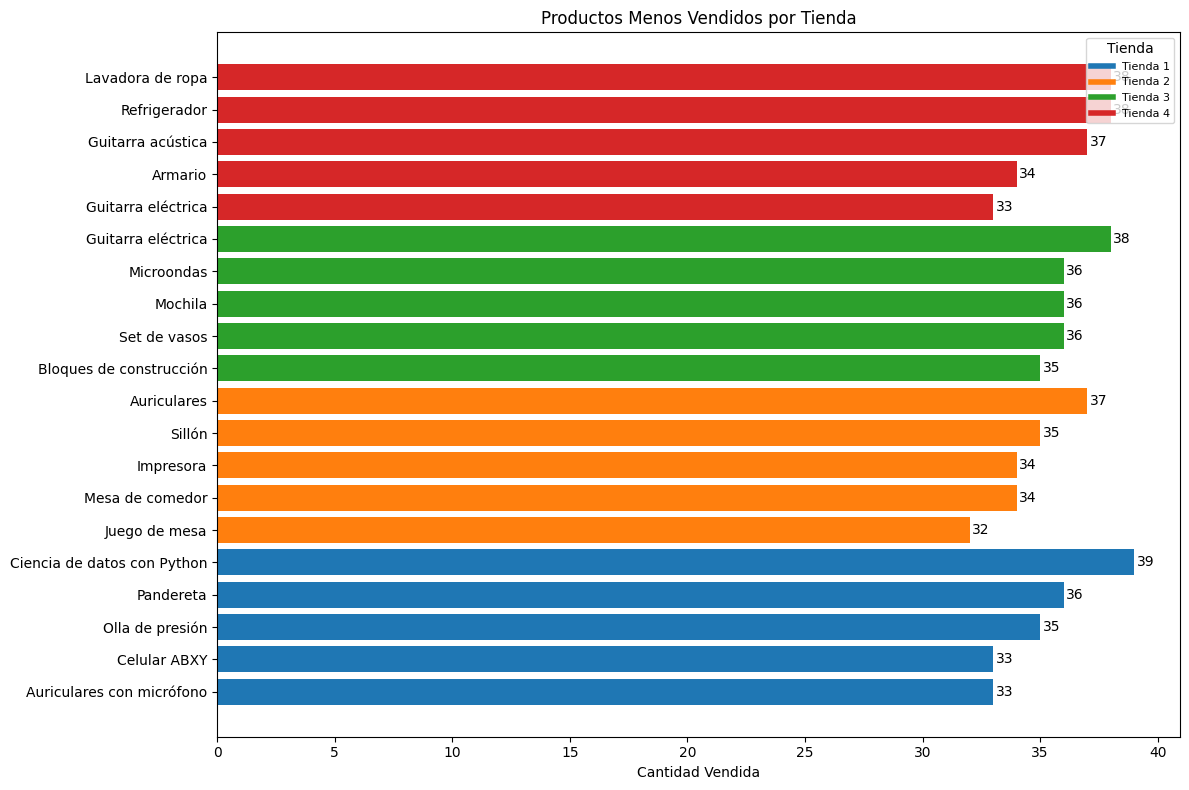

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar los productos más vendidos y menos vendidos con identificación de tienda
def graficar_mas_menos_vendidos_con_identificacion():
    # Inicializamos las listas donde guardaremos los datos para los gráficos
    productos_top_all = []
    cantidades_top_all = []
    productos_bottom_all = []
    cantidades_bottom_all = []
    tiendas_all = []
    colores_tiendas_top = []  # Lista para almacenar los colores de las tiendas (productos más vendidos)
    colores_tiendas_bottom = []  # Lista para almacenar los colores de las tiendas (productos menos vendidos)
    legend_handles = []  # Lista para almacenar los handles de la leyenda para cada tienda

    # Graficar para cada tienda
    tiendas = [("Tienda 1", tienda_1["Producto"]), 
               ("Tienda 2", tienda_2["Producto"]),
               ("Tienda 3", tienda_3["Producto"]),
               ("Tienda 4", tienda_4["Producto"])]

    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colores diferentes para cada tienda

    for idx, (nombre_tienda, tienda) in enumerate(tiendas):
        # Calcular los 5 productos más vendidos y menos vendidos
        top_5 = cantidades_por_productos(tienda, "maximo")
        bottom_5 = cantidades_por_productos(tienda, "minimo")

        # Separar los productos y cantidades
        productos_top = [item[0] for item in top_5]
        cantidades_top = [item[1] for item in top_5]
        productos_bottom = [item[0] for item in bottom_5]
        cantidades_bottom = [item[1] for item in bottom_5]

        # Añadir los productos y cantidades al listado general
        productos_top_all.extend(productos_top)
        cantidades_top_all.extend(cantidades_top)
        productos_bottom_all.extend(productos_bottom)
        cantidades_bottom_all.extend(cantidades_bottom)
        tiendas_all.extend([nombre_tienda] * 5)  # Añadimos el nombre de la tienda

        # Añadir colores para las barras apiladas
        colores_tiendas_top.extend([colores[idx]] * 5)
        colores_tiendas_bottom.extend([colores[idx]] * 5)

        # Crear el handle de leyenda solo una vez para cada tienda
        legend_handles.append(plt.Line2D([0], [0], color=colores[idx], lw=4, label=nombre_tienda))

    # Graficar los productos más vendidos
    fig, ax = plt.subplots(figsize=(12, 8))

    # Establecer las posiciones de las barras para los más vendidos
    y_pos_top = np.arange(len(productos_top_all))

    # Crear las barras apiladas para los productos más vendidos
    for i in range(len(tiendas_all)):
        ax.barh(y_pos_top[i], cantidades_top_all[i], color=colores_tiendas_top[i], align='center')

    # Agregar etiquetas dentro de las barras para los más vendidos
    for i, (producto, cantidad) in enumerate(zip(productos_top_all, cantidades_top_all)):
        ax.text(cantidades_top_all[i] + 0.1, y_pos_top[i], str(cantidad), ha='left', va='center', fontsize=10)

    # Agregar etiquetas de los productos más vendidos
    ax.set_yticks(y_pos_top)
    ax.set_yticklabels(productos_top_all)
    ax.set_xlabel('Cantidad Vendida')
    ax.set_title('Productos Más Vendidos por Tienda')

    # Agregar la leyenda para los productos más vendidos
    ax.legend(handles=legend_handles, title="Tienda", loc="upper right", fontsize=8)

    # Ajustar el gráfico para los productos más vendidos
    plt.tight_layout()

    # Mostrar el gráfico de productos más vendidos
    plt.show()

    # Graficar los productos menos vendidos
    fig, ax = plt.subplots(figsize=(12, 8))

    # Establecer las posiciones de las barras para los menos vendidos
    y_pos_bottom = np.arange(len(productos_bottom_all))

    # Crear las barras apiladas para los productos menos vendidos
    for i in range(len(tiendas_all)):
        ax.barh(y_pos_bottom[i], cantidades_bottom_all[i], color=colores_tiendas_bottom[i], align='center')

    # Agregar etiquetas dentro de las barras para los menos vendidos
    for i, (producto, cantidad) in enumerate(zip(productos_bottom_all, cantidades_bottom_all)):
        ax.text(cantidades_bottom_all[i] + 0.1, y_pos_bottom[i], str(cantidad), ha='left', va='center', fontsize=10)

    # Agregar etiquetas de los productos menos vendidos
    ax.set_yticks(y_pos_bottom)
    ax.set_yticklabels(productos_bottom_all)
    ax.set_xlabel('Cantidad Vendida')
    ax.set_title('Productos Menos Vendidos por Tienda')

    # Agregar la leyenda para los productos menos vendidos
    ax.legend(handles=legend_handles, title="Tienda", loc="upper right", fontsize=8)

    # Ajustar el gráfico para los productos menos vendidos
    plt.tight_layout()

    # Mostrar el gráfico de productos menos vendidos
    plt.show()

# Llamar la función para graficar los productos más y menos vendidos en gráficos apilados separados con identificación de tienda
graficar_mas_menos_vendidos_con_identificacion()


## Valor del envío promedio por tienda
calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda

In [19]:
costo_promedio_envio_tienda1=round(tienda_1["Costo de envío"].mean(),2)
costo_promedio_envio_tienda2=round(tienda_2["Costo de envío"].mean(),2)
costo_promedio_envio_tienda3=round(tienda_3["Costo de envío"].mean(),2)
costo_promedio_envio_tienda4=round(tienda_4["Costo de envío"].mean(),2)
print("-------------------------------")
print('|||TIENDA 1|||')
print(f"El costo de envió promedio de la tienda 1 es: {costo_promedio_envio_tienda1:,.2f}")
print("-------------------------------")
print('|||TIENDA 2|||')
print(f"El costo de envió promedio de la tienda 1 es: {costo_promedio_envio_tienda2:,.2f}")
print("-------------------------------")
print('|||TIENDA 3|||')
print(f"El costo de envió promedio de la tienda 1 es: {costo_promedio_envio_tienda3:,.2f}")
print("-------------------------------")
print('|||TIENDA 4|||')
print(f"El costo de envió promedio de la tienda 1 es: {costo_promedio_envio_tienda4:,.2f}")

-------------------------------
|||TIENDA 1|||
El costo de envió promedio de la tienda 1 es: 26,018.61
-------------------------------
|||TIENDA 2|||
El costo de envió promedio de la tienda 1 es: 25,216.24
-------------------------------
|||TIENDA 3|||
El costo de envió promedio de la tienda 1 es: 24,805.68
-------------------------------
|||TIENDA 4|||
El costo de envió promedio de la tienda 1 es: 23,459.46


In [20]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [21]:
all_data = pd.concat([tienda_1[['lat', 'lon', 'Precio']],
                      tienda_2[['lat', 'lon', 'Precio']],
                      tienda_3[['lat', 'lon', 'Precio']],
                      tienda_4[['lat', 'lon', 'Precio']]])

In [25]:
import folium as folium
from folium import plugins

In [26]:

# Crear un mapa centrado en la ubicación promedio de las tiendas
map_center = [all_data['lat'].mean(), all_data['lon'].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# Agregar el mapa de calor
folium.plugins.HeatMap(data=all_data[['lat', 'lon', 'Precio']].values, radius=15).add_to(my_map)

# Mostrar el mapa
my_map

# Final Report: Store Analysis to Decide on the Sale of a Store

Se evaluara de cada tienda, los siguientes criterios clave:

- Ingresos Totales: Para evaluar la magnitud del rendimiento económico de cada tienda.

- Calificación Promedio de Clientes: Para analizar la satisfacción del cliente y la probabilidad de éxito a largo plazo.

- Coste Promedio de Envío: Para entender los costos operativos y cómo impactan la rentabilidad.

- Ventas de Productos: Para ver qué productos se están moviendo bien y cuáles están estancados.

Desarrollo del Análisis
1. Ingresos Totales
Los ingresos son un indicador clave del desempeño general de una tienda. Aunque una tienda puede generar ingresos altos, no necesariamente está obteniendo ganancias altas debido a otros factores como costes operativos, satisfacción del cliente, y eficiencia en las ventas.

Tienda 1: 1,150,880,400

Tienda 2: 1,116,343,500

Tienda 3: 1,098,019,600

Tienda 4: 1,038,375,700

Tienda 1 tiene los mayores ingresos, lo que sugiere un buen desempeño en términos de ventas. Sin embargo, no necesariamente es la tienda más rentable.

2. Calificación Promedio de Clientes
La satisfacción del cliente es crucial para el éxito a largo plazo. Una tienda con buenas calificaciones probablemente tendrá una base de clientes leales, lo que se traduce en ventas constantes.

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 4.00

Tienda 3 tiene la mejor calificación (4.05), lo que indica una excelente satisfacción del cliente. Esto es positivo ya que una tienda bien valorada tiene más posibilidades de crecer en el futuro.

3. Coste Promedio de Envío
El coste de envío afecta directamente a la rentabilidad de una tienda. Las tiendas con costes de envío más bajos suelen ser más eficientes y pueden ofrecer precios más competitivos, lo que puede generar más ventas.

Tienda 1: 26,018.61

Tienda 2: 25,216.24

Tienda 3: 24,805.68

Tienda 4: 23,459.46

Tienda 4 tiene el coste promedio de envío más bajo, lo que le da una ventaja operativa en términos de eficiencia. Esto puede ser un indicio de que la tienda está manejando sus operaciones de manera más efectiva en comparación con las demás.

4. Productos Más y Menos Vendidos
El rendimiento de productos específicos nos permite identificar qué tan bien está funcionando cada tienda en diferentes categorías. Las tiendas con una buena rotación de productos tienden a tener un flujo constante de ingresos.

Tienda 1: Productos como Microondas, TV LED UHD 4K, y Armario están entre los más vendidos.

Tienda 2: Iniciando en programación, Microondas, y Batería son los más vendidos.

Tienda 3: Kit de bancas, Mesa de comedor, y Cama king son los más vendidos.

Tienda 4: Cama box, Cubertería, y Dashboards con Power BI son los más vendidos.

Tienda 3 y Tienda 4 tienen un buen rendimiento en términos de ventas de productos, con categorías diversas que se están moviendo bien. Sin embargo, Tienda 1 tiene productos muy populares como Microondas y TV LED UHD 4K, lo que también indica un buen desempeño en algunas categorías clave.

## Análisis Comparativo: ¿Cuál Tienda tiene menor desempeño?
Tienda 1 tiene los mayores ingresos, pero su calificación de clientes (3.98) es la más baja de todas. Además, su coste de envío es relativamente alto, lo que podría afectar su rentabilidad a largo plazo. Aunque tiene buenos productos en ventas, la baja calificación podría reflejar problemas de satisfacción del cliente que podrían escalar con el tiempo.

Tienda 2 tiene un rendimiento de ingresos algo menor que Tienda 1, pero una calificación decente (4.04). Sin embargo, no tiene la ventaja en costes de envío ni en ventas de productos como otras tiendas. El hecho de que algunos productos populares como Mesa de comedor y Sillón no se vendan bien podría indicar que hay una falta de enfoque en las categorías clave de alta demanda.

Tienda 3 tiene una excelente calificación de clientes (4.05), ingresos competitivos, y una venta sólida de productos clave como Kit de bancas y Mesa de comedor. A pesar de no tener los ingresos más altos, su rendimiento global es sólido, con una buena mezcla de productos populares y satisfacción del cliente.

Tienda 4 tiene el coste de envío más bajo, lo que es una ventaja competitiva importante. A pesar de no tener los ingresos más altos, su eficiencia operativa y la satisfacción del cliente (4.00) la hacen una tienda competitiva. El rendimiento de productos como Cama box y el curso "Dashboards con Power BI" es destacado.

**Conclusión: ¿Cuál Tienda Debería Ser Vendida?**
Basado en todos los análisis, Tienda 2 parece ser la que actualmente tiene menos rendimiento en comparación con las otras. Aunque tiene ingresos decentes y una calificación de clientes razonable, no tiene la misma eficiencia operativa ni la variedad de productos de alto rendimiento que Tienda 3 o Tienda 4. Además, los productos menos vendidos y la falta de ventajas competitivas en costes de envío hacen que Tienda 2 sea menos atractiva como una inversión futura.

##### **Por lo tanto, se recomienda que el Sr. Juan venda Tienda 2 y considere reinvertir en un nuevo negocio o en mejorar su desempeño en otras áreas.**